In [1]:
# Import Important Libraries
import ast
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [2]:
# Read the csv file
data=pd.read_csv("D:\DATA SCIENCE\Data set\India Agriculture Crop Production.csv")
data

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [3]:
# To check the shape
data.shape

(345407, 10)

In [4]:
# To check the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [5]:
# To check null values
data.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [6]:
#  Drop rows with missing values and remove rows where the crop is "Dry Ginger"
data.dropna(inplace=True)
data = data[data['Crop']!='Dry Ginger']

In [7]:
data.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

# Data Exploratory Analysis

In [8]:
#  Print the total number of unique states and display the count of each state
print("Total Number of Unique States",data['State'].value_counts().shape[0])
data['State'].value_counts()

Total Number of Unique States 36


Uttar Pradesh                  44635
Madhya Pradesh                 29455
Karnataka                      27322
Bihar                          24686
Rajasthan                      19743
Assam                          18179
Tamil Nadu                     18051
Maharashtra                    17615
Andhra Pradesh                 16162
Odisha                         16101
Chhattisgarh                   14732
Gujarat                        13968
West Bengal                    12580
Haryana                         6931
Uttarakhand                     6628
Nagaland                        5674
Jharkhand                       4991
Himachal Pradesh                4974
Telangana                       4662
Kerala                          4642
Arunachal Pradesh               4344
Jammu and Kashmir               4342
Meghalaya                       4322
Punjab                          4098
Manipur                         3092
Tripura                         2557
Mizoram                         2108
P

In [9]:
# Group the data by state
g =data.groupby('State')
g

In [10]:
# Get the data for a specific group (e.g., Bihar)
g_bihar = g.get_group('Bihar')
g_bihar

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
5231,Bihar,ARARIA,Arhar/Tur,2001-02,Kharif,483.0,Hectare,677.0,Tonnes,1.401656
5232,Bihar,ARARIA,Arhar/Tur,2002-03,Kharif,302.0,Hectare,369.0,Tonnes,1.221854
5233,Bihar,ARARIA,Arhar/Tur,2003-04,Kharif,2901.0,Hectare,3522.0,Tonnes,1.214064
5234,Bihar,ARWAL,Arhar/Tur,2003-04,Kharif,76.0,Hectare,96.0,Tonnes,1.263158
5235,Bihar,AURANGABAD,Arhar/Tur,2001-02,Kharif,562.0,Hectare,724.0,Tonnes,1.288256
...,...,...,...,...,...,...,...,...,...,...
308999,Bihar,VAISHALI,Wheat,1998-99,Rabi,45231.0,Hectare,114786.0,Tonnes,2.537773
309000,Bihar,VAISHALI,Wheat,1999-00,Rabi,40889.0,Hectare,98847.0,Tonnes,2.417447
309001,Bihar,VAISHALI,Wheat,2000-01,Rabi,43299.0,Hectare,109076.0,Tonnes,2.519134
309002,Bihar,WEST SINGHBHUM,Wheat,1997-98,Rabi,379.0,Hectare,600.0,Tonnes,1.583113


In [11]:
# Get the data for a specific district (e.g., BEGUSARAI) within the Bihar group
g_bihar[g_bihar['District']=='BEGUSARAI']

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
5241,Bihar,BEGUSARAI,Arhar/Tur,2001-02,Kharif,1288.0,Hectare,1826.0,Tonnes,1.417702
5242,Bihar,BEGUSARAI,Arhar/Tur,2002-03,Kharif,1327.0,Hectare,1839.0,Tonnes,1.385833
5243,Bihar,BEGUSARAI,Arhar/Tur,2003-04,Kharif,1228.0,Hectare,1006.0,Tonnes,0.819218
5382,Bihar,BEGUSARAI,Banana,2001-02,Whole Year,278.0,Hectare,23786.0,Tonnes,85.561151
5383,Bihar,BEGUSARAI,Banana,2002-03,Whole Year,306.0,Hectare,24560.0,Tonnes,80.261438
...,...,...,...,...,...,...,...,...,...,...
308736,Bihar,BEGUSARAI,Urad,2000-01,Kharif,1171.0,Hectare,729.0,Tonnes,0.622545
308832,Bihar,BEGUSARAI,Wheat,1997-98,Rabi,59668.0,Hectare,109241.0,Tonnes,1.830814
308833,Bihar,BEGUSARAI,Wheat,1998-99,Rabi,57520.0,Hectare,118548.0,Tonnes,2.060987
308834,Bihar,BEGUSARAI,Wheat,1999-00,Rabi,61704.0,Hectare,129568.0,Tonnes,2.099831


In [12]:
# Print the total number of unique crops and display the count of each crop
print("Total Number of Unique Crops",data['Crop'].value_counts().shape[0])
data['Crop'].value_counts()

Total Number of Unique Crops 55


Rice                     21573
Maize                    20329
Moong(Green Gram)        14813
Urad                     14389
Sesamum                  12744
Groundnut                12515
Wheat                    11219
Rapeseed &Mustard        10919
Sugarcane                10826
Arhar/Tur                10774
Potato                   10729
Onion                    10621
Gram                     10330
Jowar                     9682
Dry chillies              8890
Bajra                     7740
Peas & beans (Pulses)     7179
Sunflower                 7104
Small millets             6859
Cotton(lint)              6318
Masoor                    6296
Turmeric                  5916
Barley                    5808
Linseed                   5793
Ragi                      5725
Sweet potato              5656
Other Kharif pulses       5590
Horse-gram                5294
Garlic                    4958
Coriander                 4954
Soyabean                  4953
Other Rabi pulses         4728
Ginger  

In [13]:
# Display the count of each season
data['Season'].value_counts()

Kharif        136165
Rabi           99804
Whole Year     67265
Summer         21972
Winter          8238
Autumn          6967
Name: Season, dtype: int64

In [14]:
# Display the count of each unit of measurement for area
data['Area Units'].value_counts()

Hectare    340411
Name: Area Units, dtype: int64

In [15]:
# Display the count of each unit of measurement for production
data['Production Units'].value_counts()

Tonnes    326996
Bales      10524
Nuts        2891
Name: Production Units, dtype: int64

In [16]:
# Filter the dataset for 'Tonnes' production units
data = data[data['Production Units']=='Tonnes']

# Data Visualization

<AxesSubplot:xlabel='Season', ylabel='count'>

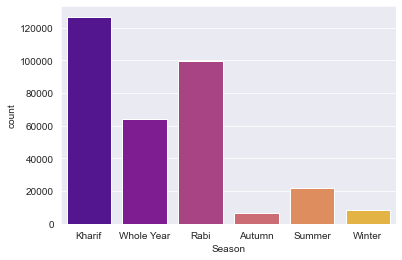

In [17]:
# Create a countplot of crops by season
sns.countplot(x ='Season', data = data, palette ='plasma')

Kharif and Rabi Crops quantity are more than other seasons crops.

<AxesSubplot:xlabel='Season', ylabel='Production'>

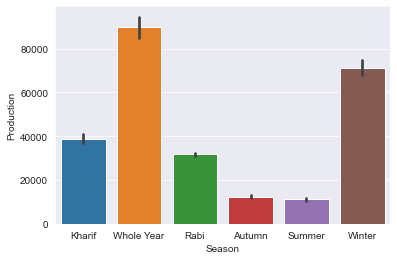

In [18]:
# Create a barplot showing the production by season
sns.barplot(x='Season',y='Production',data=data)

As we can see from the above graph we understant that whole Year crops have maximum production.

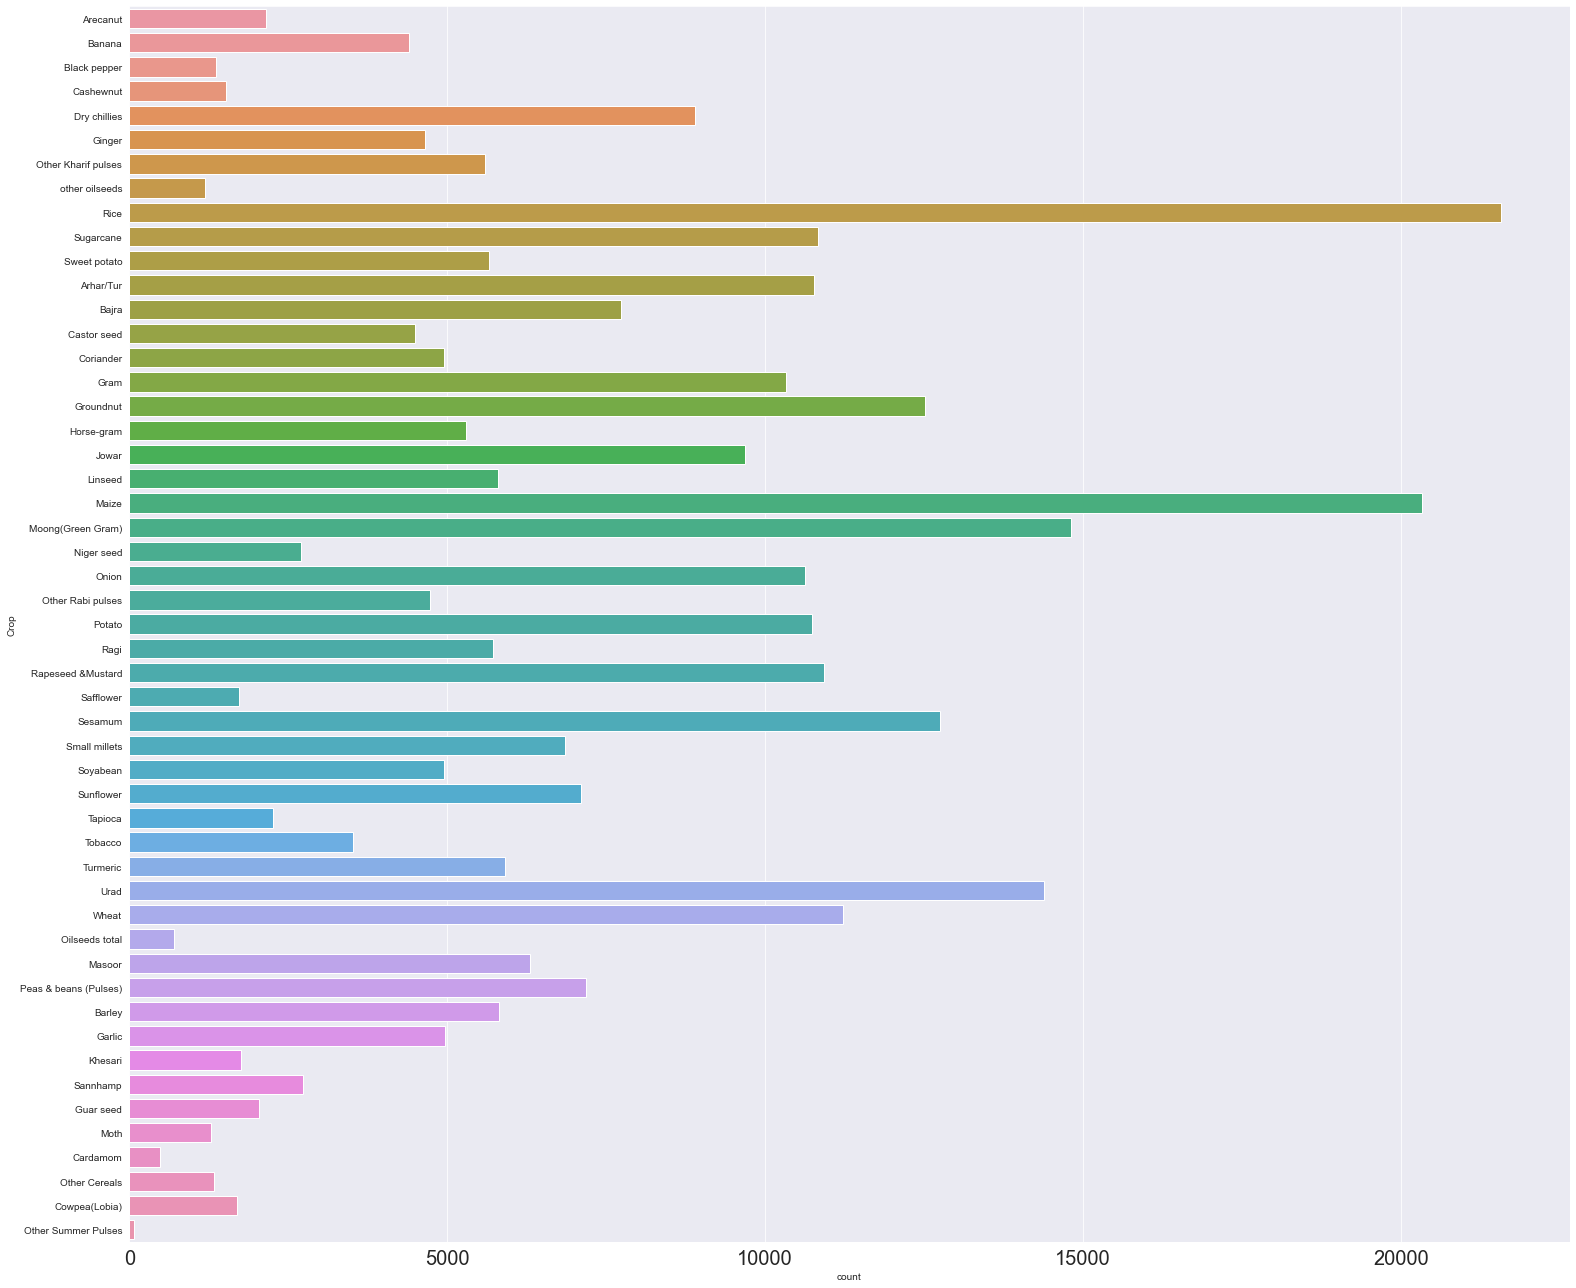

In [19]:
# Create a countplot of crops
plt.figure(figsize=(22,18)) # this creates a figure 22 inch wide, 18 inch high

ax = sns.countplot(y="Crop", data=data)

plt.setp(ax.get_xticklabels(), rotation=0,fontsize=20)
plt.tight_layout()
plt.show()

Since,Coconut is way ahead from other crops in terms of Yield. So for visualization of other crops as well we have to ignore coconut.

# Recommendation System

In [20]:
# Select relevant columns
data=data[['State','District','Crop','Season','Area','Production']]

In [21]:
# Encode categorical columns
category_col=['State','District','Crop','Season',]
labelEncoder=preprocessing.LabelEncoder()
mapping_dict={}

In [22]:
for col in category_col:
    data[col]=labelEncoder.fit_transform(data[col])
    le_name_mapping =dict(zip(labelEncoder.classes_,
                              labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)
                

{'State': {'Andaman and Nicobar Islands': 0, 'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'Chandigarh': 5, 'Chhattisgarh': 6, 'Dadra and Nagar Haveli': 7, 'Daman and Diu': 8, 'Delhi': 9, 'Goa': 10, 'Gujarat': 11, 'Haryana': 12, 'Himachal Pradesh': 13, 'Jammu and Kashmir': 14, 'Jharkhand': 15, 'Karnataka': 16, 'Kerala': 17, 'Laddakh': 18, 'Madhya Pradesh': 19, 'Maharashtra': 20, 'Manipur': 21, 'Meghalaya': 22, 'Mizoram': 23, 'Nagaland': 24, 'Odisha': 25, 'Puducherry': 26, 'Punjab': 27, 'Rajasthan': 28, 'Sikkim': 29, 'Tamil Nadu': 30, 'Telangana': 31, 'Tripura': 32, 'Uttar Pradesh': 33, 'Uttarakhand': 34, 'West Bengal': 35}, 'District': {'24 PARAGANAS NORTH': 0, '24 PARAGANAS SOUTH': 1, 'ADILABAD': 2, 'AGAR MALWA': 3, 'AGRA': 4, 'AHMADABAD': 5, 'AHMEDNAGAR': 6, 'AIZAWL': 7, 'AJMER': 8, 'AKOLA': 9, 'ALAPPUZHA': 10, 'ALIGARH': 11, 'ALIPURDUAR': 12, 'ALIRAJPUR': 13, 'ALLAHABAD': 14, 'ALMORA': 15, 'ALWAR': 16, 'AMBALA': 17, 'AMBEDKAR NAGAR': 18, 'AMETHI': 19, 'AMRAVAT

In [23]:
data

,State,District,Crop,Season,Area,Production
0,0,481,0,1,1254.0,2061.0
1,0,481,0,4,1258.0,2083.0
2,0,481,0,4,1261.0,1525.0
3,0,485,0,1,3100.0,5239.0
4,0,627,0,4,3105.0,5267.0
...,...,...,...,...,...,...
345370,35,527,49,2,6310.0,15280.0
345371,35,531,49,2,1895.0,2760.0
345372,35,531,49,2,3736.0,5530.0
345373,35,531,49,2,2752.0,6928.0


In [24]:
# Split the data into features (X) and target variable (Y)
X=data.drop('Production',axis=1)
Y=data['Production']

In [25]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(X)
scaled_data=scalar.transform(X)

In [26]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(scaled_data,Y,test_size=0.25,random_state=234)

In [27]:
# Train a Random Forest Regression model
model=RandomForestRegressor(n_estimators=20,max_depth=10,criterion='mse')

In [28]:
# To fit the model
model.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)

In [29]:
# Make predictions on the test set
y_pred=model.predict(x_test)
y_pred

array([14213.19775799,   424.7378482 ,  1459.24167358, ...,
          91.26021436,    57.63463662,   925.04030211])

In [30]:
# Calculate the R-squared score
r2_score(y_test,y_pred)

0.9637671147055905